(12L, 1L) (21L, 1L) (21L, 1L)


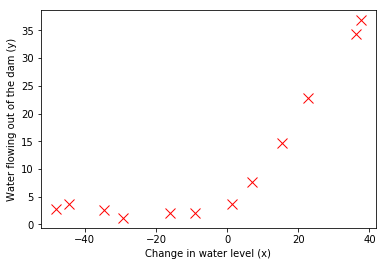

In [1]:
#本文是绘制学习曲线，学会误差分析,从而进行模型诊断和选择
#Loading and Visualizing Data
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
data = sio.loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']
print X.shape,Xval.shape,Xtest.shape

plt.plot(X,y,'rx',markersize= 10,linewidth= 1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()



In [5]:
#正则化用于线性回归
def linearRegCostFunction(X,y,theta,reg):
    m,n = X.shape
    J = 0
    theta = theta.reshape((n,1))
    grad = np.zeros_like(theta)
    theta1 = theta[1:,:]
    J = 0.5 * np.sum((X.dot(theta)-y)**2) / m + reg * 0.5 * np.sum(theta1**2) / m
    grad = X.T.dot(X.dot(theta) - y) / m
    grad[1:,:] += reg * theta1 / m  #float reg = 1--->reg = 1.0
    return J,grad

m = X.shape[0]
XX = np.hstack((np.ones((m,1)),X))  #add the x0 = 1
XXval = np.hstack((np.ones((Xval.shape[0],1)),Xval))
XXtest = np.hstack((np.ones((Xtest.shape[0],1)),Xtest)) 
#还是用简单的数测试一下正确性
init_theta = np.array([[1],[1]])  #init the theta
J,grad = linearRegCostFunction(XX,y,init_theta,1.0)
print 'Cost at theta = [1 ; 1]: (this value should be about 303.993192)'
print J
print 'Gradient at theta = [1 ; 1](this\
 value should be about [-15.303016; 598.250744])'
print grad


    
    

Cost at theta = [1 ; 1]: (this value should be about 303.993192)
303.99319222
Gradient at theta = [1 ; 1](this value should be about [-15.303016; 598.250744])
[[ -15.30301567]
 [ 598.25074417]]


Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
result = [ 13.08790351   0.36777923]


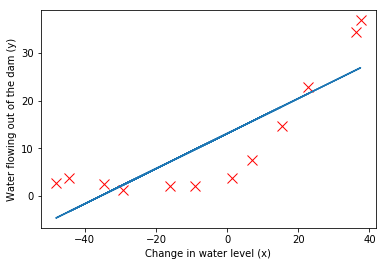

In [6]:
from scipy import optimize

def f(params,*args):
    X,y,reg = args
    m,n = X.shape
    J = 0
    theta = params.reshape((n,1))
    theta1 = theta[1:,:]
    J = 0.5 * np.sum((X.dot(theta)-y)**2) / m + reg * 0.5 * np.sum(theta1**2) / m

    return J

def gradf(params,*args):
    X,y,reg = args
    m,n = X.shape
    theta = params.reshape((n,1))
    grad = np.zeros_like(theta)
    theta1 = theta[1:,:]
    grad = X.T.dot(X.dot(theta) - y) / m
    grad[1:,:] += reg * theta1 / m  #float / 1--->1.0
    g = grad.ravel()
    return g

#Train linear regression with lambda = 0
#用优化算法去训练
def train(X,y,reg):
    args = (X,y,reg)
    inital_theta = np.zeros((X.shape[1],1))
    params = inital_theta.ravel()
    res = optimize.fmin_cg(f,x0=params,fprime=gradf,args=args,maxiter=500)
    return res
res = train(XX,y,0)
print 'result =',res
#可视化一下训练出来的参数res,也即theta权重参数
#可以看出效果一般，因为是一个直线
plt.plot(X,y,'rx',markersize= 10,linewidth= 1.5)
plt.plot(X,XX.dot(res),'-')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

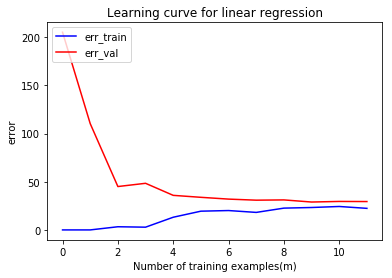

In [8]:
#定义一下学习曲线，观察数据集大小m的变化对训练误差和验证误差的影响
def learnCurve(X,y,Xval,yval,reg):
    m = X.shape[0]
    err_train = []
    err_val = []
    for i in xrange(m): #increase the data size :1--->m(m=12)
        best_theta = train(X[:i+1,:],y[0:i+1],reg)
        err_t,g1 = linearRegCostFunction(X[0:i+1,:],y[0:i+1],best_theta,reg)
        err_v,g2= linearRegCostFunction(Xval,yval,best_theta,reg)
        err_train.append(err_t)
        err_val.append(err_v)
    return err_train,err_val

err_train,err_val = learnCurve(XX,y,XXval,yval,0)
print err_train[:5]
print err_val[:5]
#可视化一下训练误差err_train和验证误差err_val的变化
plt.plot(err_train,'b',linestyle = '-',label = 'err_train')
plt.plot(err_val,'r',linestyle = '-',label = 'err_val')
plt.xlabel('Number of training examples(m)')
plt.ylabel('error')
plt.title('Learning curve for linear regression')
plt.legend(loc = 'upper left')
plt.show()


In [9]:
#从上面的图形看出，模型属于“高偏差”，那么增大数据集没有用，只能够增加模型复杂度，改进模型
#所以增加多项式或者高次项特征
def ployFeatures(X,p=8):
    '''X is a vector'''
    X_ploy = np.zeros((X.shape[0],p))
    for i in xrange(p):
        X_ploy[:,i] = X.T**(i+1)
    return X_ploy

#因为有高次项，所以进行特征均值归一化，进行特征缩放
def featureNormalize(x):
    mu = np.mean(x,axis=0)
    xx = x - mu
    sigma = np.std(x,axis=0)
    x_norm = xx / sigma
    return x_norm,mu,sigma
X_ploy = ployFeatures(X,p=8)
X_ploy,mu,sigma = featureNormalize(X_ploy)
X_ploy = np.hstack((np.ones((X.shape[0],1)),X_ploy))
print mu #correct
print sigma
print X_ploy[1,:]


[ -5.08542635e+00   8.48904834e+02  -1.28290173e+04   1.28967789e+06
  -2.98314592e+07   2.29330301e+09  -6.84527284e+10   4.42233759e+12]
[  2.86887308e+01   7.54346385e+02   4.61380464e+04   1.66104441e+06
   8.99399404e+07   3.68940106e+09   1.89508052e+11   8.31905350e+12]
[ 1.         -0.8389201   0.0013142  -0.25896174 -0.34156482  0.09754927
 -0.45519664  0.26677343 -0.46887381]


In [10]:
X_ploy_test = ployFeatures(Xtest,p=8)
X_ploy_test = (X_ploy_test - mu) / sigma #都是用训练集的mu,和sigma去缩放
X_ploy_test = np.hstack((np.ones((Xtest.shape[0],1)),X_ploy_test))

X_ploy_val = ployFeatures(Xval,p=8)
X_ploy_val = (X_ploy_val - mu) / sigma
X_ploy_val = np.hstack((np.ones((Xval.shape[0],1)),X_ploy_val))

print X_ploy.shape,X_ploy_test.shape,X_ploy_val.shape

(12L, 9L) (21L, 9L) (21L, 9L)


         Current function value: 0.036248
         Iterations: 500
         Function evaluations: 934
         Gradient evaluations: 934
[ 11.21756451   9.90756794  19.77561411  21.01763445 -36.70150507
 -52.39888966  28.56695973  42.27227577   3.23441143]


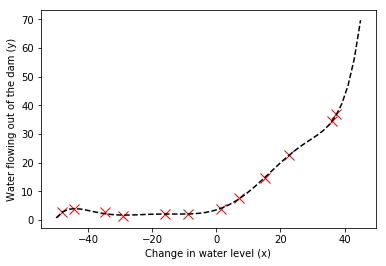

In [12]:
#正则化强度=0,等于没有用正则化，容易过拟合
res1 = train(X_ploy,y,0)
print res1
#我们可视化一下拟合的曲线,会发现过拟合了，所以需要选择合适的reg,正则化强度这个超参数
def plotFit(mu,sigma,theta,p):
    x = np.linspace(-50,45).reshape(-1,1)
    x_ploy = ployFeatures(x,p)
    x_ploy = x_ploy - mu
    x_ploy = x_ploy / sigma
    x_ploy = np.hstack((np.ones((x.shape[0],1)),x_ploy))
    plt.plot(x,x_ploy.dot(theta),'--',color='black')

    pass

plt.plot(X,y,'rx',markersize= 10,linewidth= 1.5)
plotFit(mu,sigma,res1,p=8)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 138
         Function evaluations: 268
       

         Current function value: 0.013916
         Iterations: 500
         Function evaluations: 919
         Gradient evaluations: 919


         Current function value: 0.000240
         Iterations: 500
         Function evaluations: 939
         Gradient evaluations: 939
         Current function value: 0.033273
         Iterations: 500
         Function evaluations: 921
         Gradient evaluations: 921
         Current function value: 0.033852
         Iterations: 393
         Function evaluations: 761
         Gradient evaluations: 749


         Current function value: 0.036248
         Iterations: 500
         Function evaluations: 934
         Gradient evaluations: 934
[0.0, 9.8607613152626476e-32, 4.6174429281007728e-11, 2.8102318141054581e-20, 1.2849842344335099e-16]
[161.442168317425, 160.79229150111109, 67.08492232193683, 67.726849416925191, 6.6169871317870843]


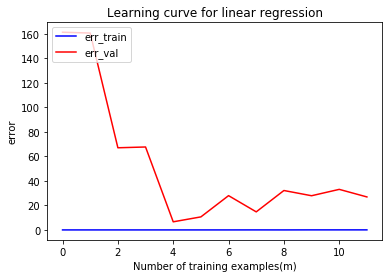

In [13]:
#在这之前还是绘制一下这个模型的学习曲线，看看模型方差和偏差怎么样
err_train,err_val = learnCurve(X_ploy,y,X_ploy_val,yval,0)
print err_train[:5]
print err_val[:5]

plt.plot(err_train,'b',linestyle = '-',label = 'err_train')
plt.plot(err_val,'r',linestyle = '-',label = 'err_val')
plt.xlabel('Number of training examples(m)')
plt.ylabel('error')
plt.title('Learning curve for linear regression')
plt.legend(loc = 'upper left')
plt.show()


         Current function value: 0.036248
         Iterations: 500
         Function evaluations: 934
         Gradient evaluations: 934
         Current function value: 0.178862
         Iterations: 93
         Function evaluations: 185
         Gradient evaluations: 173
         Current function value: 0.243176
         Iterations: 299
         Function evaluations: 584
         Gradient evaluations: 572
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 209
         Function evaluations: 398
         Gradient evaluations: 398
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 130
         Function evaluations: 234
         Gradient evaluations: 234


Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 63
         Function evaluations: 122
         Gradient evaluations: 122
Optimization terminated successfully.
         Current function value: 2.917649
         Iterations: 48
         Function evaluations: 83
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 31.878154
         Iterations: 15
         Function evaluations: 25
         Gradient evaluations: 25


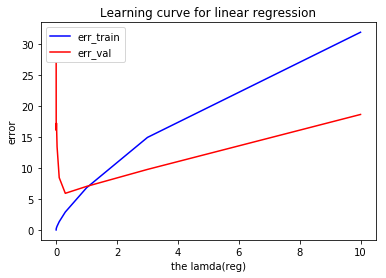

In [26]:
#从上图可以看出，模型属于高方差，过拟合了，所以需要加入正则化,reg就不能等于0了
#选择多少合适，就需要交叉验证来决定了
def validationCurve(X,y,Xval,yval):
    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1.0,3.0,10.0] #1,3,10-->1.0,3.0,10.0
    err_train = []
    err_val = []
    for reg in lambda_vec: #choice the reg
        best_theta = train(X,y,reg)
        err_t,g1 = linearRegCostFunction(X,y,best_theta,reg)
        err_v,g2= linearRegCostFunction(Xval,yval,best_theta,reg)
        err_train.append(err_t)
        err_val.append(err_v)
    return lambda_vec,err_train,err_val

lambda_vec,err_train,err_val = validationCurve(X_ploy,y,X_ploy_val,yval) 
plt.plot(lambda_vec,err_train,'b',linestyle = '-',label = 'err_train')
plt.plot(lambda_vec,err_val,'r',linestyle = '-',label = 'err_val')
plt.xlabel('the lamda(reg)')
plt.ylabel('error')
plt.title('Learning curve for linear regression')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
#打印对比一下err_train和err_val
print 'reg\terr_train\terr_val'
for i in xrange(len(lambda_vec)):
    print '%f\t%f\t%f' %(lambda_vec[i],err_train[i],err_val[i])


reg	err_train	err_val
0.000000	0.036248	26.937810
0.001000	0.178862	16.253146
0.003000	0.243176	16.075527
0.010000	0.371282	17.235271
0.030000	0.636703	13.421113
0.100000	1.360572	8.453900
0.300000	2.917649	5.932013
1.000000	6.830463	7.047226
3.000000	14.937646	9.782200
10.000000	31.878154	18.633922


Optimization terminated successfully.
         Current function value: 2.917649
         Iterations: 48
         Function evaluations: 83
         Gradient evaluations: 83
[ 11.21759788  10.36108651   6.90555014   2.55156851   1.33110548
   0.41366221  -0.06161811   0.28647949  -0.61899355]


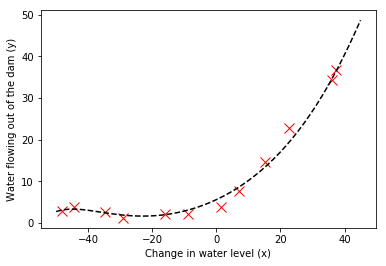

In [29]:
#so good reg is 0.3,结果会平滑一点，不会太过拟合
res1 = train(X_ploy,y,reg=0.3)
print res1
#可视化一下拟合的曲面,发现更加平滑了，不会过拟合
def plotFit(mu,sigma,theta,p):
    x = np.linspace(-50,45).reshape(-1,1)
    x_ploy = ployFeatures(x,p)
    x_ploy = x_ploy - mu
    x_ploy = x_ploy / sigma
    x_ploy = np.hstack((np.ones((x.shape[0],1)),x_ploy))
    plt.plot(x,x_ploy.dot(theta),'--',color='black')

    pass

plt.plot(X,y,'rx',markersize= 10,linewidth= 1.5)
plotFit(mu,sigma,res1,p=8)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

